In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [52]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Features :**
- PassengerId: Id of the passenger.
- Pclass: Passenger class.
- Name: Name of the passenger.
- Sex: Sex of the passenger.
- Age: Age of passenger.
- SibSp: Siblings/Spouses aboard the Titanic
- Parch: Parents/Children aboard the Titanic.
- Ticket: Ticket of passenger.
- Fare: Fare of passenger.
- Cabin: Cabin of passenger.
- Embarked: From where the traveler mounted.

**Target :**
- Survived: Passenger has survived or not.

In [53]:
titanic.shape

(891, 12)

In [54]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

Filled all the missing values of Age and Embarked columns using fillna and with the help of median() and mode(). And not filling the missing values in cabin as we are going to drop the cabin column.

## EDA:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

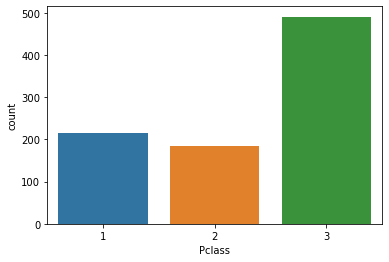

In [58]:
sns.countplot(titanic['Pclass'])

**- Countplot of Pclass.**
- Maximum no. of passengers are in Pclass 3.
- Then Pclass 1
- And Pclass 2 has the least no. of passenger.

<AxesSubplot:xlabel='Sex', ylabel='count'>

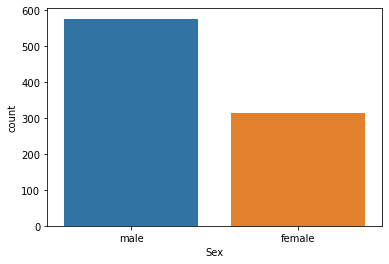

In [59]:
sns.countplot(x = 'Sex', data = titanic)

**- Countplot for Sex.**
- Males are more than Females

<AxesSubplot:xlabel='Embarked', ylabel='count'>

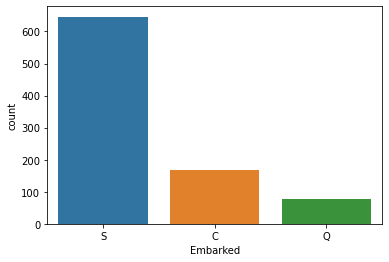

In [60]:
sns.countplot(titanic['Embarked'])

**- Counplot for Embarked.**
- 70% of the people boarded from Southampton.
- 20% boarded from Cherbourg.
- 10% boarded from Queenstown.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

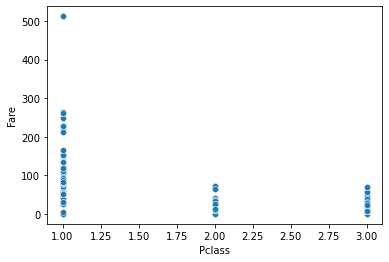

In [61]:
sns.scatterplot(y = 'Fare', x = 'Pclass', data = titanic)

**- Scatterplot between Fare and Pclass.**
- Fare for Pclass 1 is highest.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

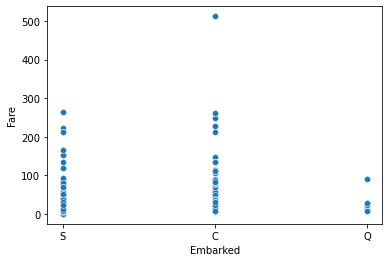

In [62]:
sns.scatterplot(x = 'Embarked', y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

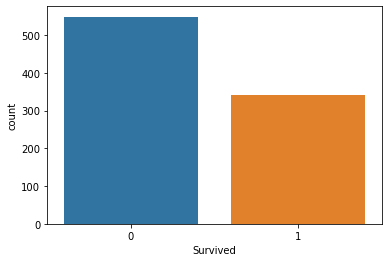

In [63]:
sns.countplot(titanic.Survived)

**- Countplot for Survived(target).**
- More no. of passengers was not able to survive the titanic shrink.
- Our target column is Balanced, and good to go.

## Data Cleaning :

In [64]:
titanic = titanic.drop(columns = ['PassengerId','Name','Ticket','Cabin'])

**- Encoding:**

In [65]:
lab = LabelEncoder()
titanic['Sex'] = lab.fit_transform(titanic['Sex'])
titanic['Embarked'] = lab.fit_transform(titanic['Embarked'])

In [66]:
print(titanic['Sex'].dtypes)
print(titanic['Embarked'].dtypes)

int64
int64


In [67]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Final and cleaned Dataset.

## Correlation :

In [48]:
data_corr = titanic.corr()

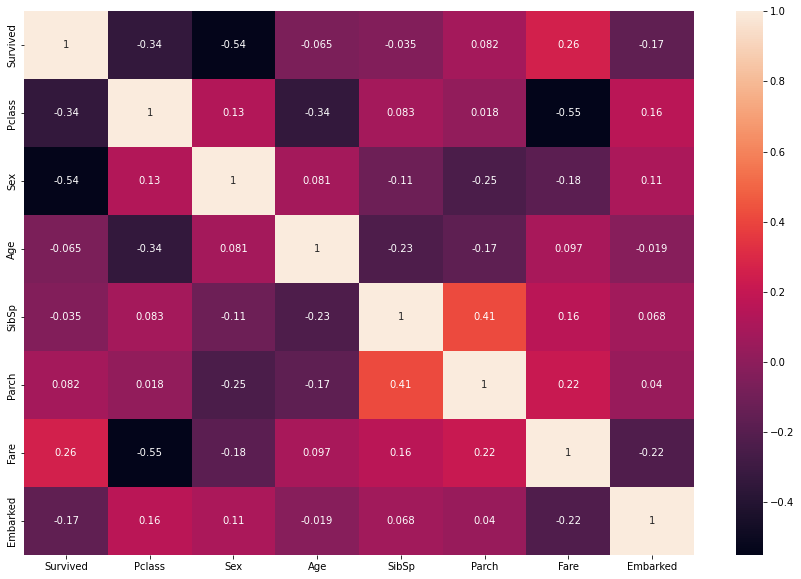

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(data_corr,annot = True)
plt.show()

There is no multicollinearty problem in our dataset.

**- Seperating Features and Target columns.**

In [68]:
x = titanic.drop('Survived',axis =1)
y = titanic.Survived

**- Using Standard scaler on features to scale the values.**

In [73]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)
x_scaled

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.25833709, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.47367361,
        -0.49237783, -0.67817453]])

## Training the Model

**- Train Test Split.**

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25)

**- Model Instantiating.**

In [77]:
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()

**- Creating The function for the training and testing score, so that, we can get the results just by calling the function.**

In [78]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

**- KNeighborsClassifier Modle.**

In [81]:
kn.fit(x_train,y_train)
score(kn, x_train,x_test,y_train,y_test,train = True)
score(kn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8592814371257484

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       429
           1       0.81      0.79      0.80       239

    accuracy                           0.86       668
   macro avg       0.85      0.84      0.85       668
weighted avg       0.86      0.86      0.86       668


 ----- Confusion matrix ----- 
 [[385  44]
 [ 50 189]]

 ----- Test Result ----- 

Accuracy Score: 0.7623318385650224

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       120
           1       0.76      0.72      0.74       103

    accuracy                           0.76       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.76      0.76      0.76       223


 ----- Confusion matrix ----- 
 [[96 24]
 [29 74]]


**- DecisionTreeClassifier Model.**

In [82]:
dt.fit(x_train,y_train)
score(dt, x_train,x_test,y_train,y_test,train = True)
score(dt, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9820359281437125

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       429
           1       1.00      0.95      0.97       239

    accuracy                           0.98       668
   macro avg       0.99      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668


 ----- Confusion matrix ----- 
 [[428   1]
 [ 11 228]]

 ----- Test Result ----- 

Accuracy Score: 0.7488789237668162

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.73      0.85      0.78       120
           1       0.78      0.63      0.70       103

    accuracy                           0.75       223
   macro avg       0.76      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223


 ----- Confusion matrix ----- 
 [[102  18]
 [ 38  65]]


**- AdaBoostClassifier Model.**

In [83]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.844311377245509

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       429
           1       0.79      0.76      0.78       239

    accuracy                           0.84       668
   macro avg       0.83      0.83      0.83       668
weighted avg       0.84      0.84      0.84       668


 ----- Confusion matrix ----- 
 [[382  47]
 [ 57 182]]

 ----- Test Result ----- 

Accuracy Score: 0.8116591928251121

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.80      0.88      0.83       120
           1       0.84      0.74      0.78       103

    accuracy                           0.81       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.81      0.81      0.81       223


 ----- Confusion matrix ----- 
 [[105  15]
 [ 27  76]]


**- RandomForestClassifier Model.**

In [84]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9820359281437125

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       429
           1       1.00      0.95      0.97       239

    accuracy                           0.98       668
   macro avg       0.99      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668


 ----- Confusion matrix ----- 
 [[428   1]
 [ 11 228]]

 ----- Test Result ----- 

Accuracy Score: 0.7982062780269058

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       120
           1       0.83      0.71      0.76       103

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223


 ----- Confusion matrix ----- 
 [[105  15]
 [ 30  73]]


**- ROC AUC CURVE.**

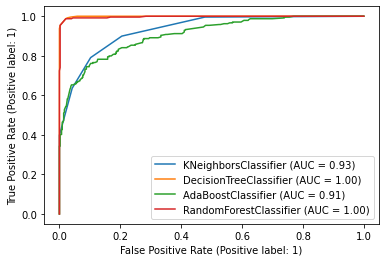

In [85]:
disp = plot_roc_curve(kn, x_train, y_train)
plot_roc_curve(dt,x_train,y_train, ax = disp.ax_)
plot_roc_curve(ada,x_train,y_train, ax = disp.ax_)
plot_roc_curve(rf,x_train,y_train, ax = disp.ax_)
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

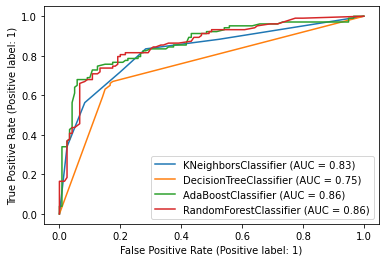

In [86]:
disp = plot_roc_curve(kn, x_test, y_test)
plot_roc_curve(dt,x_test,y_test, ax = disp.ax_)
plot_roc_curve(ada,x_test,y_test, ax = disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax = disp.ax_)
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

**Among all models, Found that AdaBoostClassifier model gives the best score for training and testing.**

## Hyperparameter Tuning.

In [87]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [88]:
params = {'algorithm': ['SAMME', 'SAMME.R'],
          'learning_rate':[0.1,0.5,1.0],
          'n_estimators':range(1,50,10),
          'random_state':range(1,100,10)}

In [91]:
grid = GridSearchCV(ada, param_grid = params)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 41, 'random_state': 1}


In [92]:
ada_h = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1.0, n_estimators = 41, random_state = 1)

In [93]:
ada_h.fit(x_train,y_train)
score(ada_h, x_train,x_test,y_train,y_test,train = True)
score(ada_h, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.811377245508982

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       429
           1       0.75      0.70      0.73       239

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.79       668
weighted avg       0.81      0.81      0.81       668


 ----- Confusion matrix ----- 
 [[374  55]
 [ 71 168]]

 ----- Test Result ----- 

Accuracy Score: 0.7668161434977578

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       120
           1       0.77      0.71      0.74       103

    accuracy                           0.77       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223


 ----- Confusion matrix ----- 
 [[98 22]
 [30 73]]


**Post Tuning, the result is not good so considering the previous model(Before Tuning).**

**- Saving the Model.**

In [98]:
filename = 'Titanic.pickle'
pickle.dump(ada, open(filename, 'wb'))